## Portfolio Optimization

Given the historical series of a set of securities and of SP500, Brent price and 3M Treasury, you are asked to:
* find the Markowitz portfolio for a 0.32 expected annual return;
* draw efficient frontier of the risky portfolio and the CAL assuming an additional risk free asset (3M Treasury);
* find the Sharpe portfolio;
* comment the resulting plots.
As proxy for the risk-free rate use the average of 3M Treasury (rf column).

Using a two-factors model (SP500 and Brent), find:
* the best 10 assets to invest on given that there is strong evidence for a sudden decrease of Oil price. Motivate the choice (also looking at the sector of the assets, the info can be retrived using yfinance module).

The input is just an historical series file.

### Notes and Hints

Numerical results must be presented to the examining committee during a presentation in which the candidates will also explain the theoretical framework of the portfolio optimization models.

In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/finance_course/Projects')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/Projects/proj8.csv", index_col="Date")
print (df.head())

                   AAP       ABMD        AOS        APA        ATO       CBOE  \
Date                                                                            
2014-03-27  120.386787  25.770000  20.311985  70.738632  38.335091  53.106892   
2014-03-28  121.125298  25.700001  20.594727  71.548737  38.443562  52.420502   
2014-03-31  122.922981  26.040001  20.653065  71.488411  39.328094  53.219734   
2014-04-01  123.651749  26.200001  20.810135  72.186493  39.169537  52.956448   
2014-04-02  123.272804  26.000000  21.007603  72.591560  39.553406  51.950348   

                 Brent        COP        CVX        DVA  ...        NOV  \
Date                                                     ...              
2014-03-27  101.279999  55.201248  84.980484  68.389999  ...  61.768215   
2014-03-28  101.669998  56.045704  85.579918  68.449997  ...  63.100582   
2014-03-31  101.580002  56.045704  85.875999  68.849998  ...  63.263077   
2014-04-01   99.739998  56.013840  85.940994  69.339996  

## Markowitz

In [ ]:
all = list(df.columns)
all.remove("SP500")
all.remove("Brent")
all.remove("rf")
print (all)

['AAP', 'ABMD', 'AOS', 'APA', 'ATO', 'CBOE', 'COP', 'CVX', 'DVA', 'DVN', 'ET', 'FFIV', 'FTI', 'HII', 'HSIC', 'IFF', 'IPGP', 'IRM', 'IVZ', 'JNPR', 'LNC', 'LPG', 'MOS', 'NCLH', 'NI', 'NOV', 'PRGO', 'PVH', 'QCOM', 'SEE', 'UNM', 'WU', 'XRAY']


In [ ]:
import numpy as np

r0 = df['rf'].mean()

portfolio = df[all]
daily_returns = portfolio.pct_change()
returns = 252*daily_returns.mean()
covariance = 252*daily_returns.cov()

print (r0)
print (returns)
print (covariance)

0.0040709099998185
AAP     0.032100
ABMD    0.701586
AOS     0.297326
APA    -0.103439
ATO     0.183844
CBOE    0.209726
COP     0.041632
CVX     0.060103
DVA     0.012973
DVN    -0.066576
ET      0.118743
FFIV    0.115763
FTI    -0.080091
HII     0.283627
HSIC    0.050928
IFF     0.133327
IPGP    0.365671
IRM     0.153760
IVZ     0.035622
JNPR    0.047093
LNC     0.154745
LPG    -0.116462
MOS    -0.088737
NCLH    0.169657
NI      0.177186
NOV    -0.069007
PRGO   -0.094399
PVH     0.084553
QCOM   -0.013666
SEE     0.114886
UNM     0.131544
WU      0.096664
XRAY    0.054661
dtype: float64
           AAP      ABMD       AOS       APA       ATO      CBOE       COP  \
AAP   0.098084  0.017280  0.016855  0.019144  0.008550  0.008858  0.015659   
ABMD  0.017280  0.181520  0.024735  0.014437  0.006832  0.011588  0.008475   
AOS   0.016855  0.024735  0.049082  0.027216  0.008844  0.011003  0.025499   
APA   0.019144  0.014437  0.027216  0.152368  0.008237  0.001943  0.088082   
ATO   0.008550 

In [ ]:
from scipy.optimize import minimize

def markowitz(w, cov):
    return w.T.dot(cov.dot(w))

def target_return(w, returns, target):
    return w.dot(returns) - target

def sum_weights(w):
    return sum(w) - 1

const = ({'type':'eq', 'fun':sum_weights},
         {'type':'eq', 'fun':target_return, 'args':(returns, 0.32)})
bounds = [(0, 1) for _ in range(len(all))]
weights = [1/len(all) for _ in range(len(all))]

opts = minimize(markowitz, weights, args=(covariance,),
                constraints=const, bounds=bounds)
print (opts)

     fun: 0.021230516088097014
     jac: array([0.02456971, 0.08976802, 0.03979901, 0.02760451, 0.02550426,
       0.02863476, 0.02403303, 0.02210507, 0.02069929, 0.0304063 ,
       0.049764  , 0.03101653, 0.02562483, 0.03808623, 0.02429358,
       0.02525003, 0.0483786 , 0.02720304, 0.03981351, 0.03050706,
       0.03644888, 0.01910315, 0.02600487, 0.03151603, 0.02472927,
       0.01903793, 0.02546463, 0.02571882, 0.02560198, 0.03166889,
       0.02655828, 0.02934726, 0.02413771])
 message: 'Optimization terminated successfully'
    nfev: 612
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([2.69921073e-18, 1.77495571e-01, 1.27239153e-01, 0.00000000e+00,
       2.57062240e-01, 2.07232449e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.83230903e-17, 4.56419292e-17, 6.06177367e-18,
       1.45219387e-17, 9.65522486e-02, 9.49679394e-19, 0.00000000e+00,
       8.33851051e-02, 9.43263248e-18, 0.00000000e+00, 1.40617494e-17,
       2.40597947e-18, 3.6686551

In [ ]:
points = []
for target in np.arange(0.01, 0.5, 0.01):
    const = ({'type':'eq', 'fun':sum_weights},
             {'type':'eq', 'fun':target_return, 'args':(returns, target)})
    bounds = [(0, 1) for _ in range(len(all))]
    weights = [1/len(all) for _ in range(len(all))]

    opts = minimize(markowitz, weights, args=(covariance,),
                    constraints=const, bounds=bounds)
    points.append([np.sqrt(opts.fun), target])

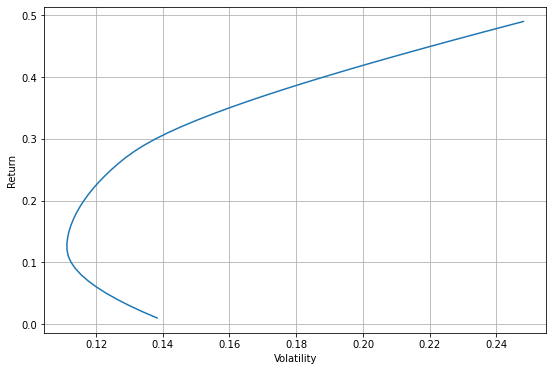

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (9, 6)
points = np.array(points)
plt.plot(points[:, 0], points[:, 1])
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.grid(True)
plt.show()

In [ ]:
def target_return_rf(w, ret, target, r0):
    return np.sum(w[:-1]*ret) + r0*w[-1] - target

def markowitz_rf(w, cov):
    return w[:-1].T.dot(cov.dot(w[:-1]))

points_rf = []
for t in np.arange(0.03, 0.5, 0.01):
    const = ({'type':'eq', 'fun':sum_weights},
             {'type':'eq', 'fun':target_return_rf, 'args':(returns, t, r0)})
    bounds = [(0, 1) for _ in range(len(all)+1)]
    weights = [1/(len(all)+1) for _ in range(len(all)+1)]

    opts = minimize(markowitz_rf, weights, args=(covariance,),
                    constraints=const, bounds=bounds)
    points_rf.append([np.sqrt(opts.fun), t])

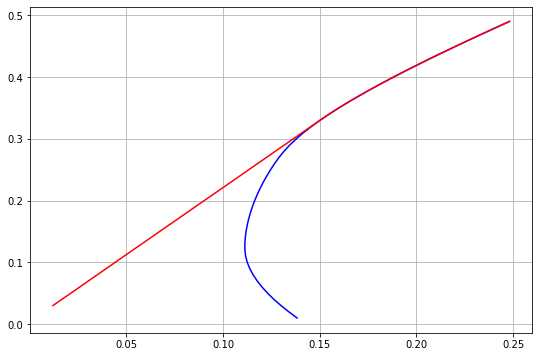

In [ ]:
points_rf = np.array(points_rf)
plt.plot(points[:, 0], points[:, 1], color='blue')
plt.plot(points_rf[:, 0], points_rf[:, 1], color='red')
plt.grid(True)
plt.show()

In [ ]:
def sharpe_ratio(w, ret, cov, r0):
    sigma = np.sqrt(w.T.dot(cov.dot(w)))
    Rp = np.sum(w*ret)
    return -(Rp-r0)/sigma

const = ({'type':'eq', 'fun':sum_weights},)
bounds = [(0, 1) for _ in range(len(all))]
weights = [1/len(all) for _ in range(len(all))]

opts = minimize(sharpe_ratio, weights, args=(returns, covariance, r0),
                constraints=const, bounds=bounds)
print (opts)

     fun: -2.1709586978063133
     jac: array([ 0.98509026, -0.0272285 , -0.02657473,  2.0352703 , -0.02683869,
       -0.02712971,  0.88637361,  0.66760734,  0.92691922,  1.92629179,
        1.65648463,  0.77277941,  1.79152337, -0.02710456,  0.84802052,
        0.33679411, -0.0277954 ,  0.28532138,  1.72128007,  1.19631904,
        0.76906568,  1.71423593,  1.86853758,  0.42300943, -0.02683643,
        1.38655755,  1.87713364,  0.70220861,  1.35098019,  0.78108829,
        0.42673859,  0.80245847,  0.82200623])
 message: 'Optimization terminated successfully'
    nfev: 552
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.00000000e+00, 1.96798871e-01, 1.29748256e-01, 4.55242348e-15,
       2.49568474e-01, 1.99325429e-01, 1.15852936e-15, 0.00000000e+00,
       0.00000000e+00, 4.16074566e-16, 3.10515400e-15, 0.00000000e+00,
       7.50883319e-16, 9.60797597e-02, 0.00000000e+00, 0.00000000e+00,
       8.73422143e-02, 0.00000000e+00, 3.27693505e-15, 1.02798035e-15,


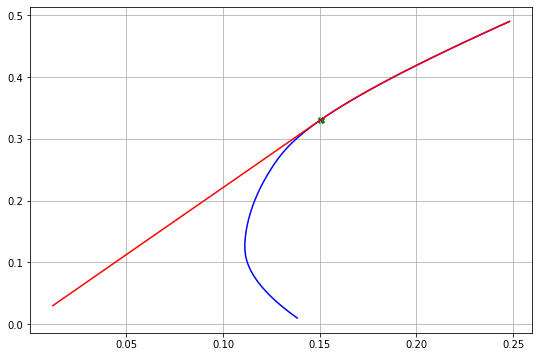

In [ ]:
p = (np.sqrt(opts.x.T.dot(covariance.dot(opts.x))), np.sum(opts.x*returns))

plt.plot(points[:, 0], points[:, 1], color='blue')
plt.plot(points_rf[:, 0], points_rf[:, 1], color='red')
plt.scatter(p[0], p[1], marker='X', color='green')
plt.grid(True)
plt.show()

In [ ]:
for i, x in enumerate(opts.x):
    if x > 0.01:
        print (all[i], x)

ABMD 0.19679887115988215
AOS 0.12974825579321125
ATO 0.2495684737819903
CBOE 0.1993254286671628
HII 0.0960797597374531
IPGP 0.0873422143393323
NI 0.041136996520961026


## Multifactor Models

In [ ]:
import numpy as np

all = list(df.columns)
#all.remove("SP500")
all.remove("Brent")
all.remove("rf")

df['rf'] = df['rf']/252

capm = all# + ['SP500']
returns = df[capm]
returns = returns.pct_change()
print (returns.head())

for c in capm:
  returns[c] = returns[c] - df['rf']
#returns['SP500'] = returns['SP500'] - df['rf']
returns['Brent'] = df['Brent'].pct_change()

returns.dropna(inplace=True)
print (returns.head())

                 AAP      ABMD       AOS       APA       ATO      CBOE  \
Date                                                                     
2014-03-27       NaN       NaN       NaN       NaN       NaN       NaN   
2014-03-28  0.006134 -0.002716  0.013920  0.011452  0.002830 -0.012925   
2014-03-31  0.014842  0.013230  0.002833 -0.000843  0.023009  0.015247   
2014-04-01  0.005929  0.006144  0.007605  0.009765 -0.004032 -0.004947   
2014-04-02 -0.003065 -0.007634  0.009489  0.005611  0.009800 -0.018999   

                 COP       CVX       DVA       DVN  ...        NI       NOV  \
Date                                                ...                       
2014-03-27       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2014-03-28  0.015298  0.007054  0.000877  0.017004  ... -0.000283  0.021570   
2014-03-31  0.000000  0.003460  0.005844  0.017328  ...  0.005092  0.002575   
2014-04-01 -0.000569  0.000757  0.007117  0.011206  ...  0.005348  0.002440   
2014-04

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

sensitivities = {}
pippo = []
for c in all:
  y = returns.loc[:, c].values
  X = returns.loc[:, ['SP500', 'Brent']].values
  X = sm.add_constant(X)
  est = sm.OLS(y, X).fit()
  print (est.rsquared)
  sensitivities[c] = [est.params, est.pvalues]
  pippo.append(est.rsquared)

print (np.mean(pippo))

0.12159015578421128
0.10880657320605358
0.4634944443814085
0.4460062220212636
0.17141629597264862
0.1081791431556639
0.5252532512041894
0.5422046560949342
0.1909876690462875
0.46222091442395075
0.20148559032334068
0.23602069257974279
0.407135623990582
0.27495919691030224
0.3122585281432375
0.36967083727923966
0.247940361924329
0.18533662117805028
0.60489756778292
0.221442946936673
0.5216339933034151
0.15510839839836887
0.22308160297166613
0.2409196502347658
0.178986999026999
0.34545645959125637
0.11895707718308679
0.2079719959943641
0.2478747331934109
0.3159517588587042
0.4745472035263245
0.4064873380553643
0.28597378864980716
1.0
0.3213017144507812


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

to_exclude = []
for k in sensitivities.keys():
  if k == "SP500":
    continue
  if sensitivities[k][1][2] < 0.05:
    to_exclude.append(k)

### Strategy 1
Choose firms with sensitivities to Brent factor NOT significant (pvalue > 0.05) and with greatest $\alpha$.

In [ ]:
print (sensitivities)

{'AAP': [array([-2.25422665e-04,  8.99369445e-01, -4.99827477e-02]), array([7.07700363e-01, 1.31326729e-28, 5.67320171e-02])], 'ABMD': [array([ 0.00259378,  1.16200016, -0.08219927]), array([1.66178998e-03, 7.64242460e-26, 2.20824634e-02])], 'AOS': [array([ 7.29721363e-04,  1.20006076e+00, -6.42202327e-03]), array([2.79889477e-002, 5.93029648e-125, 6.56932205e-001])], 'APA': [array([-7.10705694e-04,  1.04248549e+00,  4.97213041e-01]), array([2.29668324e-01, 3.35797442e-38, 2.12023062e-70])], 'ATO': [array([ 4.05420623e-04,  5.71501004e-01, -4.29356201e-02]), array([1.91812297e-01, 3.26513653e-41, 1.55576788e-03])], 'CBOE': [array([ 0.00074482,  0.52396876, -0.06859497]), array([4.57620360e-02, 1.17411246e-25, 2.60886974e-05])], 'COP': [array([-1.88719351e-04,  9.42569713e-01,  4.26276736e-01]), array([6.68901058e-01, 2.50670597e-53, 2.37172497e-88])], 'CVX': [array([-1.13630849e-04,  9.18978999e-01,  2.19446174e-01]), array([7.07944273e-01, 4.22282278e-95, 1.20623351e-54])], 'DVA': [ar

In [ ]:
chosen = []
for k in sensitivities.keys():
  if k == "SP500":
    continue
  if k not in to_exclude:
    chosen.append(k)
    proxy = yf.Ticker(k)
    print ("{} {:.5f} {}".format(k, sensitivities[k][0][0]*100, proxy.info['sector']))

AAP -0.02254 Consumer Cyclical
AOS 0.07297 Industrials
DVA -0.02584 Healthcare
FFIV 0.01060 Technology
HII 0.07220 Industrials
IRM 0.02435 Real Estate
JNPR -0.01794 Technology
NI 0.04080 Utilities
QCOM -0.05040 Technology
WU -0.00510 Financial Services


### Strategy 2
Choose firms with significant sensitivities to Brent factor (pvalue < 0.05) and with $\beta_{\textrm{oil}} < 0$.

In [ ]:
#vals = []
for t in to_exclude:
  sens = sensitivities[t][0][2]
  if sens < 0:
    proxy = yf.Ticker(t)
    print ("{} {:.3f} {}".format(t, sens, proxy.info['sector']))  
  #vals.append(sensitivities[t][0][2])

#for i in np.array(vals).argsort()[-10:]:
#  print ("{} {:.3f}".format(chosen[i], vals[i]))

ABMD -0.082 Healthcare
ATO -0.043 Utilities
CBOE -0.069 Financial Services
HSIC -0.083 Healthcare
IPGP -0.048 Technology
NCLH -0.139 Consumer Cyclical
PRGO -0.068 Healthcare
SEE -0.054 Consumer Cyclical
XRAY -0.049 Healthcare
